# Project Overview

We'll build a logistic regression model to classify whether a student passes (1) or fails (0) an exam based on two features: hours studied and hours slept.

In [1]:
# step 1. libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# step 3. Load datset
# Generate synthetic dataset
np.random.seed(42)

# Features
hours_studied = np.random.uniform(0, 10, 100)  # Hours studied (0 to 10)
hours_slept = np.random.uniform(4, 10, 100)   # Hours slept (4 to 10)

# Target: Pass (1) or Fail (0)
pass_fail = (hours_studied * 2 + hours_slept > 15).astype(int)  # Rule for passing

# Create a DataFrame
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Hours_Slept': hours_slept,
    'Pass_Fail': pass_fail
})

# Display first few rows
print(data.head())


   Hours_Studied  Hours_Slept  Pass_Fail
0       3.745401     4.188575          0
1       9.507143     7.818462          1
2       7.319939     5.886136          1
3       5.986585     7.051424          1
4       1.560186     9.445399          0


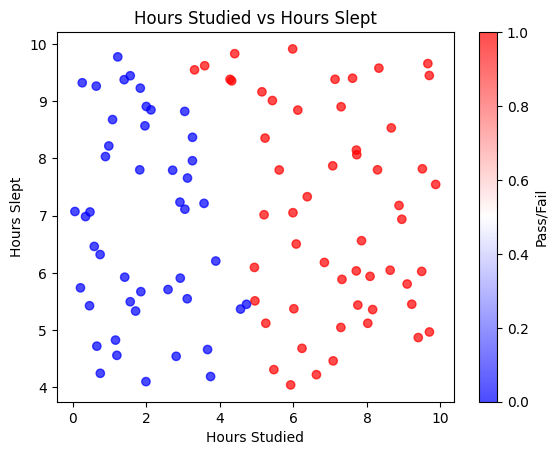

In [3]:
# 3. # Scatter plot of features
plt.scatter(data['Hours_Studied'], data['Hours_Slept'], c=data['Pass_Fail'], cmap='bwr', alpha=0.7)
plt.title('Hours Studied vs Hours Slept')
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.colorbar(label='Pass/Fail')
plt.show()


In [4]:
# 4. split data
# Features (X) and target (y)
X = data[['Hours_Studied', 'Hours_Slept']]
y = data['Pass_Fail']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 5. tarin model
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [7]:
# 6. Evaluate the model
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
 [[ 9  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


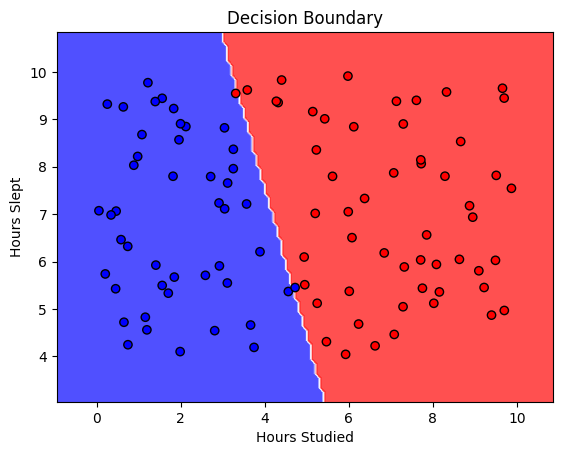

In [8]:
# visualize decision bundary

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X['Hours_Studied'].min() - 1, X['Hours_Studied'].max() + 1
y_min, y_max = X['Hours_Slept'].min() - 1, X['Hours_Slept'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X['Hours_Studied'], X['Hours_Slept'], c=y, edgecolor='black', cmap='bwr')
plt.title('Decision Boundary')
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.show()


In [9]:
# 8. predict for new data
# New data point
new_data = np.array([[7, 8]])  # Example: 7 hours studied, 8 hours slept
new_prediction = model.predict(new_data)

print(f"Prediction for new data point {new_data[0]}: {'Pass' if new_prediction[0] == 1 else 'Fail'}")


Prediction for new data point [7 8]: Pass


c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


: 